In [5]:
from quantrocket.license import get_license_profile
get_license_profile()

{'licensekey': '125b........eca7', 'software_license': {}}

In [19]:
from quantrocket.history import create_usstock_db, collect_history
from quantrocket.master import get_securities
from quantrocket.history import download_history_file
import pandas as pd

In [9]:
from quantrocket.license import set_license
set_license("125bdde4-de27-11ee-9e72-a7071c54eca7")

{'licensekey': '125b........eca7', 'software_license': {}}

In [2]:
from quantrocket.history import drop_db
drop_db("usstock-free-1d", confirm_by_typing_db_code_again="usstock-free-1d")

{'status': 'deleted quantrocket.v2.history.usstock-free-1d.sqlite'}

In [3]:
from quantrocket.history import create_usstock_db
create_usstock_db("usstock-free-1d", bar_size="1 day", free=True)

{'status': 'successfully created quantrocket.v2.history.usstock-free-1d.sqlite'}

In [4]:
from quantrocket.history import collect_history
collect_history("usstock-free-1d")

{'status': 'the historical data will be collected asynchronously'}

In [5]:
from quantrocket.master import get_securities
securities = get_securities(vendors="usstock", sec_types="STK")
securities

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000B9XRY4,AAPL,XNAS,US,USD,STK,False,America/New_York,APPLE INC,1,1,False,NaT,NaT,NaT
FIBBG000BFWKC0,MON,XNYS,US,USD,STK,False,America/New_York,MONSANTO CO,1,1,True,2018-06-06,NaT,NaT
FIBBG000BKZB36,HD,XNYS,US,USD,STK,False,America/New_York,HOME DEPOT INC,1,1,False,NaT,NaT,NaT
FIBBG000BMHYD1,JNJ,XNYS,US,USD,STK,False,America/New_York,JOHNSON & JOHNSON,1,1,False,NaT,NaT,NaT
FIBBG000BPH459,MSFT,XNAS,US,USD,STK,False,America/New_York,MICROSOFT CORP,1,1,False,NaT,NaT,NaT
FIBBG000CK38G3,KKD,XNYS,US,USD,STK,False,America/New_York,KRISPY KREME DOUGHNUTS INC,1,1,True,2016-07-27,NaT,NaT
FIBBG000GZQ728,XOM,XNYS,US,USD,STK,False,America/New_York,EXXON MOBIL CORP,1,1,False,NaT,NaT,NaT
FIBBG00B3T3HD3,AA,XNYS,US,USD,STK,False,America/New_York,ALCOA CORP,1,1,False,NaT,NaT,NaT


In [12]:
from quantrocket.master import create_universe
create_universe("usstockfrees", sids=securities.index.tolist())

{'code': 'usstockfrees', 'provided': 8, 'inserted': 8, 'total_after_insert': 8}

In [14]:
filtered_securities = securities[securities.Delisted==False]


In [16]:
filtered_securities = filtered_securities[["Symbol", "Exchange", "Name", "Delisted"]]
filtered_securities

,Symbol,Exchange,Name,Delisted
Sid,,,,
FIBBG000B9XRY4,AAPL,XNAS,APPLE INC,False
FIBBG000BKZB36,HD,XNYS,HOME DEPOT INC,False
FIBBG000BMHYD1,JNJ,XNYS,JOHNSON & JOHNSON,False
FIBBG000BPH459,MSFT,XNAS,MICROSOFT CORP,False
FIBBG000GZQ728,XOM,XNYS,EXXON MOBIL CORP,False
FIBBG00B3T3HD3,AA,XNYS,ALCOA CORP,False


In [18]:
create_universe("usstocks", sids=filtered_securities.index.tolist())

{'code': 'usstocks', 'provided': 6, 'inserted': 6, 'total_after_insert': 6}

In [20]:
create_usstock_db("aapl", bar_size="1 day", free=True)

{'status': 'successfully created quantrocket.v2.history.aapl.sqlite'}

In [21]:
collect_history("aapl")

{'status': 'the historical data will be collected asynchronously'}

In [22]:
securities = get_securities(vendors="usstock", sec_types="STK")
aapl_sid = securities.loc[securities["Symbol"] == "AAPL"].index[0]

In [29]:
from quantrocket import get_prices
price_data = get_prices("aapl", sids=["FIBBG000B9XRY4"], start_date="2022-01-01", end_date="2022-12-31", fields=["Close"])



In [30]:
csv_file_path = "aapldata.csv"
price_data.to_csv(csv_file_path)

In [31]:
print(price_data.shape)

(251, 1)


In [32]:
print(price_data)

Sid               FIBBG000B9XRY4
Field Date                      
Close 2022-01-03        179.4980
      2022-01-04        177.2199
      2022-01-05        172.5058
      2022-01-06        169.6261
      2022-01-07        169.7938
...                          ...
      2022-12-23        130.9600
      2022-12-27        129.1424
      2022-12-28        125.1797
      2022-12-29        128.7253
      2022-12-30        129.0431

[251 rows x 1 columns]


In [33]:


prices = price_data['FIBBG000B9XRY4']['Close'].to_list()
prices_df = pd.DataFrame({'Close': prices})
prices_df['Close']

0      179.4980
1      177.2199
2      172.5058
3      169.6261
4      169.7938
         ...   
246    130.9600
247    129.1424
248    125.1797
249    128.7253
250    129.0431
Name: Close, Length: 251, dtype: float64

In [34]:
returns_df = prices_df['Close'].pct_change()






In [35]:
print(returns_df)

0           NaN
1     -0.012692
2     -0.026600
3     -0.016693
4      0.000989
         ...   
246   -0.001539
247   -0.013879
248   -0.030685
249    0.028324
250    0.002469
Name: Close, Length: 251, dtype: float64


In [36]:
def map_returns(returns):
    if returns > 0.01:
        return 1
    elif returns > -0.01:
        return 0
    else:
        return -1




In [37]:
mapped_returns = returns_df.apply(map_returns)

prices_df['Mapped_Returns'] = mapped_returns

print(prices_df)

        Close  Mapped_Returns
0    179.4980              -1
1    177.2199              -1
2    172.5058              -1
3    169.6261              -1
4    169.7938               0
..        ...             ...
246  130.9600               0
247  129.1424              -1
248  125.1797              -1
249  128.7253               1
250  129.0431               0

[251 rows x 2 columns]


In [38]:

transition_counts = prices_df['Mapped_Returns'].value_counts()


transition_matrix = pd.DataFrame(0, index=[-1, 0, 1], columns=[-1, 0, 1])

for i in range(1, len(prices_df)):
    prev_state = prices_df['Mapped_Returns'][i - 1]
    current_state = prices_df['Mapped_Returns'][i]
    transition_matrix.at[prev_state, current_state] += 1

transition_probabilities = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print("Transition Matrix:")
print(transition_probabilities)


Transition Matrix:
          -1         0         1
-1  0.413793  0.344828  0.241379
 0  0.326087  0.315217  0.358696
 1  0.281690  0.478873  0.239437


In [39]:
import pandas as pd


bull_to_bull_prob = transition_probabilities.at[1, 1]
bull_to_neutral_prob = transition_probabilities.at[1, 0]
bull_to_bear_prob = transition_probabilities.at[1, -1]

neutral_to_bull_prob = transition_probabilities.at[0, 1]
neutral_to_neutral_prob = transition_probabilities.at[0, 0]
neutral_to_bear_prob = transition_probabilities.at[0, -1]

bear_to_bull_prob = transition_probabilities.at[-1, 1]
bear_to_neutral_prob = transition_probabilities.at[-1, 0]
bear_to_bear_prob = transition_probabilities.at[-1, -1]

initial_state_probabilities = {'Bull': 0.3, 'Neutral': 0.4, 'Bear': 0.3}

def calculate_transition_distribution(previous_state_probs):
    new_state_probs = {}
    new_state_probs['Bull'] = previous_state_probs['Neutral'] * bull_to_neutral_prob + \
                              previous_state_probs['Bull'] * bull_to_bull_prob + \
                              previous_state_probs['Bear'] * bear_to_bull_prob
    
    new_state_probs['Neutral'] = previous_state_probs['Neutral'] * neutral_to_neutral_prob + \
                                 previous_state_probs['Bull'] * bull_to_neutral_prob + \
                                 previous_state_probs['Bear'] * bear_to_neutral_prob
    
    new_state_probs['Bear'] = previous_state_probs['Neutral'] * neutral_to_bear_prob + \
                              previous_state_probs['Bull'] * bull_to_bear_prob + \
                              previous_state_probs['Bear'] * bear_to_bear_prob
    
    return new_state_probs

next_state_distribution = calculate_transition_distribution(initial_state_probabilities)

print("Probability Distribution for Next State:")
print(next_state_distribution)


Probability Distribution for Next State:
{'Bull': 0.33579407479358914, 'Neutral': 0.37319720421479396, 'Bear': 0.33907975589669953}


In [45]:

portfolio_value = 0


portfolio_values = []

for i in range(0,len(mapped_returns)-1):
    # Apply value function
    if mapped_returns[i] == 0 and mapped_returns[i+1]==1:
        portfolio_value += 1
    elif mapped_returns[i] == 0 and mapped_returns[i+1]==-1:
        portfolio_value -= 1
    else:
        pass
    portfolio_values.append(portfolio_value)

# Print portfolio values
print("Portfolio Values:")
print(portfolio_values)


Portfolio Values:
[0, 0, 0, 0, 0, 1, 1, 0, 0, -1, -1, -1, -1, -1, -2, -2, -2, -1, -1, -1, -1, -2, -2, -2, -1, -1, -2, -2, -2, -1, -1, -2, -2, -3, -3, -3, -3, -3, -4, -4, -4, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -4, -4, -3, -3, -2, -2, -2, -1, -1, -2, -2, -1, -1, -1, -1, -2, -2, -2, -2, -2, -2, -1, -1, -1, -2, -2, -3, -3, -2, -2, -2, -2, -1, -1, -1, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3]


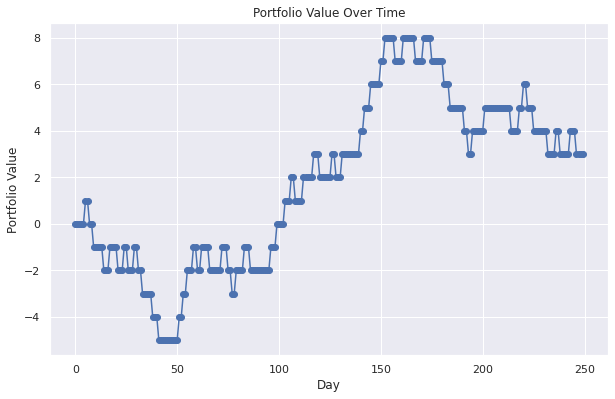

In [46]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(portfolio_values, marker='o', linestyle='-')
plt.title('Portfolio Value Over Time')
plt.xlabel('Day')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.show()


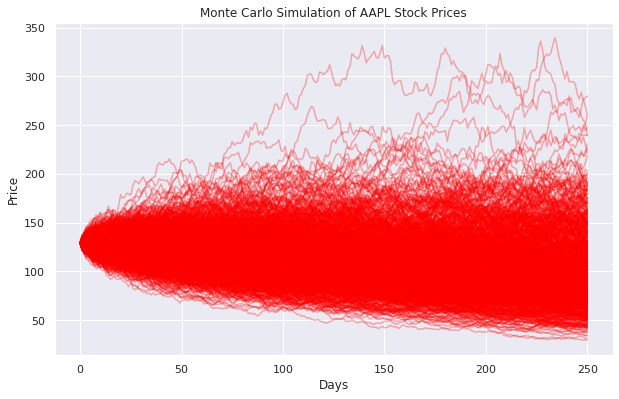

In [74]:
#Monte Carlo Simulation for AAPL Stock Price

import numpy as np


num_simulations =1000
num_days =len(prices)
daily_returns= prices_df['Close'].pct_change().dropna()
mean_return= daily_returns.mean()
std_dev=daily_returns.std()


simulated_prices=np.zeros((num_simulations, num_days))
simulated_prices[:, 0] =prices[-1]

for i in range(num_simulations):
    for day in range(1, num_days):
        simulated_prices[i, day] =simulated_prices[i, day - 1]*(1 + np.random.normal(mean_return, std_dev))

plt.figure(figsize=(10,6))
plt.plot(simulated_prices.T,color='red',alpha=0.3)
plt.title('Monte Carlo Simulation of AAPL Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


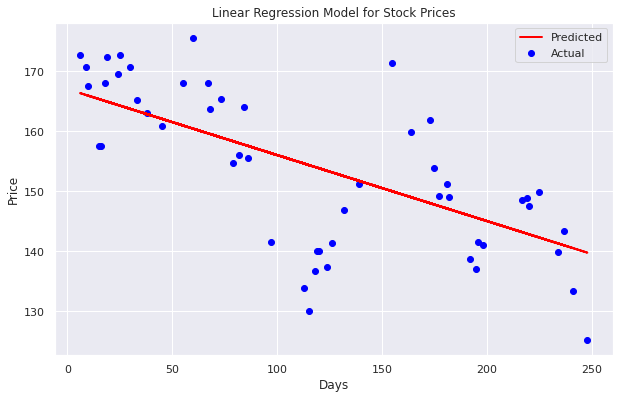

Intercept: 166.9865757699718
Coefficient: -0.1097886639893847
Mean Squared Error: 90.28612143993287
Mean Absolute Error: 7.617735216608904


In [56]:
#Applying Linear Regression on the APPL Stock Prices 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



X = np.arange(len(prices)).reshape(-1, 1)  
y = prices_df['Close']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression Model for Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
from sklearn.metrics import mean_squared_error, mean_absolute_error


mse_lr = mean_squared_error(y_test, y_pred)
mae_lr= mean_absolute_error(y_test, y_pred)


print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)




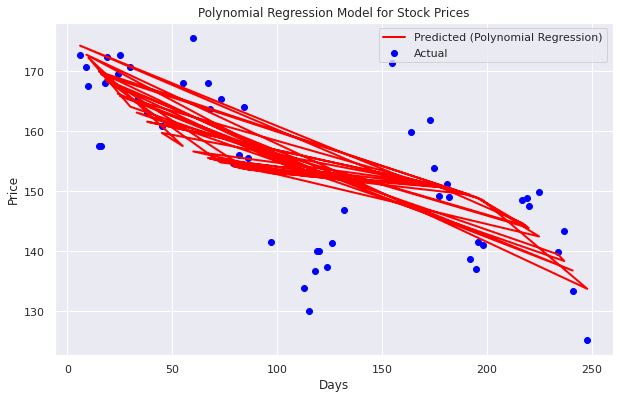

Intercept: 177.47549465202013
Coefficients: [ 0.00000000e+00 -5.65988472e-01  4.29682873e-03 -1.09918386e-05]
Mean Squared Error (Polynomial Regression): 86.68571941988161
Mean Absolute Error (Polynomial Regression): 7.424736362996642


In [62]:
from sklearn.preprocessing import PolynomialFeatures


X = np.arange(len(prices)).reshape(-1, 1)  
y = prices_df['Close'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_degree = 3  
poly_features = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_poly, color='red', linewidth=2, label='Predicted (Polynomial Regression)')
plt.title('Polynomial Regression Model for Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

print("Intercept:", poly_model.intercept_)
print("Coefficients:", poly_model.coef_)

mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print("Mean Squared Error (Polynomial Regression):", mse_poly)
print("Mean Absolute Error (Polynomial Regression):", mae_poly)





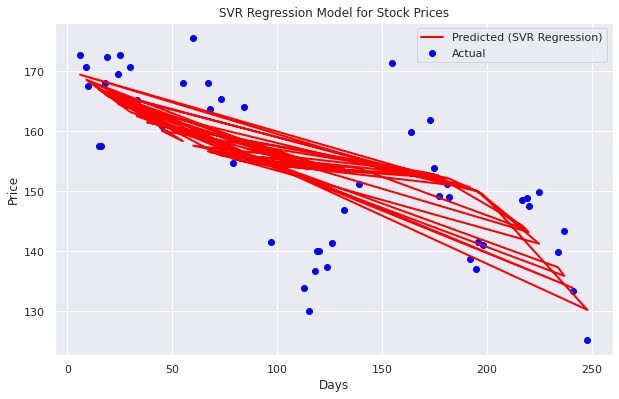

Mean Squared Error (SVR): 89.26146875675414
Mean Absolute Error (SVR): 7.566417916311756


In [64]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler



X = np.arange(len(prices)).reshape(-1, 1)  
y = prices_df['Close']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_degree = 3 
poly_features = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

svr_model = SVR(kernel='poly', degree=poly_degree)  
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_svr, color='red', linewidth=2, label='Predicted (SVR Regression)')
plt.title('SVR Regression Model for Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()



mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)


print("Mean Squared Error (SVR):", mse_svr)
print("Mean Absolute Error (SVR):", mae_svr)



In [65]:
!pip install statsmodels



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


RMSE: 7.153519944603968


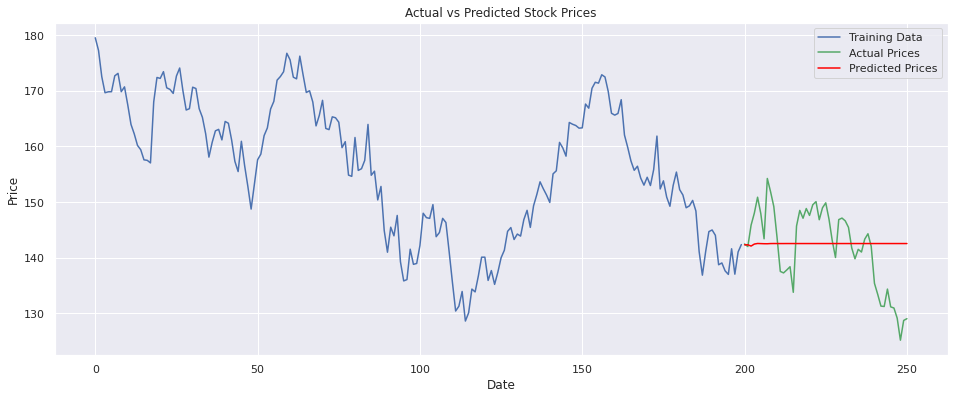

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

prices = price_data['FIBBG000B9XRY4']['Close'].to_list()
prices_df = pd.DataFrame({'Close': prices})

train_size = int(len(prices_df) * 0.8)
train_data, test_data = prices_df.iloc[:train_size], prices_df.iloc[train_size:]

order = (5, 1, 0) 

model = ARIMA(train_data, order=order)
fitted_model = model.fit()


forecast = fitted_model.forecast(steps=len(test_data))
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print('RMSE:', rmse)


plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Prices')
plt.plot(test_data.index, forecast, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.63043D+00    |proj g|=  8.51255D-02


 This problem is unconstrained.



At iterate    5    f=  2.54127D+00    |proj g|=  3.42278D-02

At iterate   10    f=  2.53218D+00    |proj g|=  1.18550D-02

At iterate   15    f=  2.53190D+00    |proj g|=  6.22662D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     20      1     0     0   6.227D-06   2.532D+00
  F =   2.5319044835292810     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RMSE: 7.139930284423489


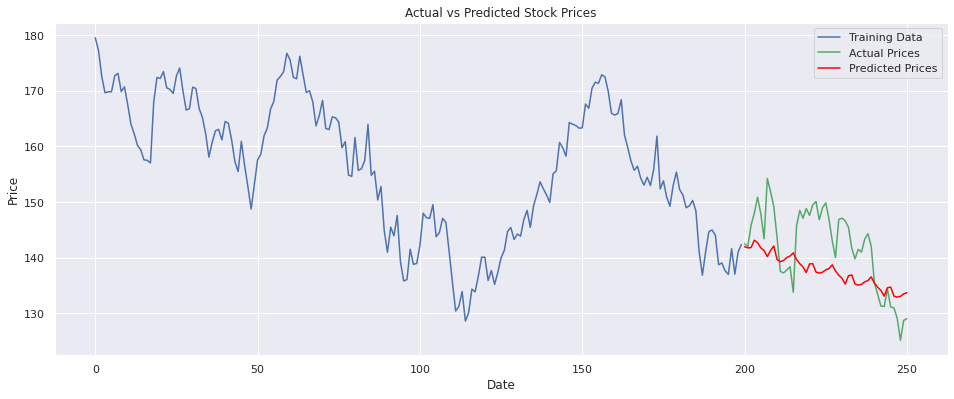

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

prices = price_data['FIBBG000B9XRY4']['Close'].to_list()
prices_df = pd.DataFrame({'Close': prices})


train_size = int(len(prices_df) * 0.8)
train_data, test_data = prices_df.iloc[:train_size], prices_df.iloc[train_size:]


order = (5, 1, 0)  
seasonal_order = (1, 1, 1, 12)  


model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
fitted_model = model.fit()

forecast = fitted_model.forecast(steps=len(test_data))
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Visualization
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Prices')
plt.plot(test_data.index, forecast, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()


RMSE: 7.418397592924637


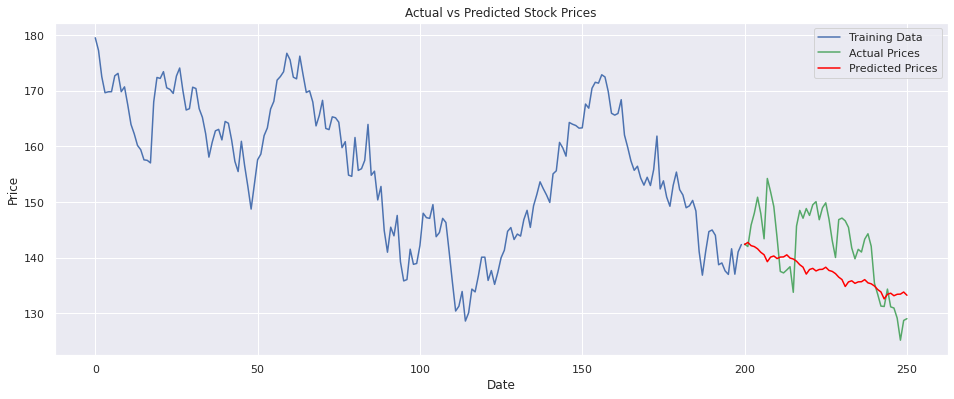

In [73]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing


train_size = int(len(prices_df) * 0.8)
train_data, test_data = prices_df.iloc[:train_size], prices_df.iloc[train_size:]

model = ExponentialSmoothing(train_data, seasonal_periods=12, trend='add', seasonal='add')
fitted_model = model.fit()

forecast = fitted_model.forecast(len(test_data))
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Prices')
plt.plot(test_data.index, forecast, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()
